In [42]:
# Import Library
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator 

In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
training_dir = '/content/gdrive/My Drive/training'
validation_dir = '/content/gdrive/My Drive/validation'


In [45]:
def random_brightness(image):
    return tf.image.random_brightness(image,max_delta=0.5)

In [46]:
IMG_PATH = 'Multi-class Weather Dataset'

img_datagen = ImageDataGenerator(
        rescale = 1./255, #Rescale Gambar
        rotation_range = 0.45, #Rotasi Gambar
        width_shift_range = 0.2, #Geser gambar 
        height_shift_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        validation_split = 0.1,
        fill_mode = 'nearest',
        preprocessing_function = random_brightness
)

In [47]:
train_generator = img_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    shuffle = True,
    class_mode = 'categorical',
)

validation_generator = img_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 8, 
    shuffle = True,
    class_mode = 'categorical',
)

Found 674 images belonging to 4 classes.
Found 459 images belonging to 4 classes.


In [49]:
image, label = train_generator.next()

In [50]:
label_name = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

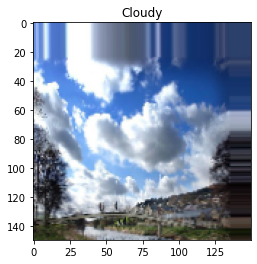

In [52]:
index = 4
plt.title(label_name[tf.argmax(label[index])])
plt.imshow(image[4])

In [53]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=[150,150,3]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 8)        0

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
hasilTrain = model.fit(train_generator, epochs=25)

Epoch 1/25
85/85 [==============================] - 16s 186ms/step - loss: 0.5614 - accuracy: 0.7611
Epoch 2/25
85/85 [==============================] - 16s 186ms/step - loss: 0.5269 - accuracy: 0.7760
Epoch 3/25
85/85 [==============================] - 16s 184ms/step - loss: 0.5375 - accuracy: 0.7789
Epoch 4/25
85/85 [==============================] - 16s 186ms/step - loss: 0.5195 - accuracy: 0.7745
Epoch 5/25
85/85 [==============================] - 16s 184ms/step - loss: 0.5076 - accuracy: 0.7893
Epoch 6/25
85/85 [==============================] - 16s 187ms/step - loss: 0.4858 - accuracy: 0.7997
Epoch 7/25
85/85 [==============================] - 16s 186ms/step - loss: 0.5129 - accuracy: 0.7849
Epoch 8/25
85/85 [==============================] - 16s 186ms/step - loss: 0.4470 - accuracy: 0.8012
Epoch 9/25
85/85 [==============================] - 17s 191ms/step - loss: 0.4230 - accuracy: 0.8220
Epoch 10/25
85/85 [==============================] - 16s 185ms/step - loss: 0.5033 - accura

In [59]:
hasilVal = model.fit(validation_generator, epochs=10)

Epoch 1/10
58/58 [==============================] - 79s 1s/step - loss: 0.3579 - accuracy: 0.8627
Epoch 2/10
58/58 [==============================] - 9s 152ms/step - loss: 0.3453 - accuracy: 0.8780
Epoch 3/10
58/58 [==============================] - 10s 171ms/step - loss: 0.3668 - accuracy: 0.8519
Epoch 4/10
58/58 [==============================] - 9s 152ms/step - loss: 0.2669 - accuracy: 0.8976
Epoch 5/10
58/58 [==============================] - 9s 152ms/step - loss: 0.2643 - accuracy: 0.9020
Epoch 6/10
58/58 [==============================] - 9s 151ms/step - loss: 0.2862 - accuracy: 0.8780
Epoch 7/10
58/58 [==============================] - 9s 150ms/step - loss: 0.2741 - accuracy: 0.8889
Epoch 8/10
58/58 [==============================] - 9s 151ms/step - loss: 0.2333 - accuracy: 0.9041
Epoch 9/10
58/58 [==============================] - 9s 152ms/step - loss: 0.2384 - accuracy: 0.9194
Epoch 10/10
58/58 [==============================] - 9s 151ms/step - loss: 0.2345 - accuracy: 0.9020
